# Fetal Health Classification 
### Author: Pengju Sun

## Data Understanding
"Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more."  

The dataset used for this project can be found at https://www.kaggle.com/andrewmvd/fetal-health-classification. It contains 2,126 rows of 22 features extracted from Cardiotocogram (CTG) exams, which were then classified by three expert obstetritians into 3 classes:
* Normal
* Suspect 
* Pathological  

Cardiotocograms (CTGs) measure values such as fetal heart rate, fetal movement, and uterine contractions. "CTGs are a simple and cost-accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality."  Using data from actual patients' CTG exams and their accomponaying fetal health outcomes assigned by expert obstetricians, I have determined that automated assessment of fetal health is possible using CTG data.

## Business Problem

Since fetal risk and mortality is such a devastating problem, what can be done to decrease these numbers and preserve maternal and fetal health? I will be answering the question of how to predict fetal health outcomes based on CTG data. This information can be used by medical professionals, specifically in the field of obstetrics, to minimize the occurrence of fetal mortality. While this is arguably more of a health problem than a business problem, medical practices can benefit greatly from these findings by ensuring the best possible patient health.  
I will be working towards answering the following questions:
1. Can performing CTGs as preventative care help predict fetal health outcomes?
2. If so, which measures on a CTG exam are most significant when predicting fetal health outcomes?

### Hypotheses  

Null hypothesis (H0): There is no relationship between automated CTG data and fetal health outcome.  
Alternative hypothesis (Ha): There is a relationship between automated CTG data and fetal health outcome



## 1. Import Necessary Libraries and Data Sets.

In [1]:
import warnings
warnings.simplefilter(action ="ignore")
warnings.filterwarnings('ignore')
from collections import Counter
# Import the necessary packages
import numpy as np
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.metrics import plot_precision_recall_curve
import pickle

## 2. Exploratory Data Analysis (EDA) and Data Preprocessing

In [2]:
# Load Dataset
data = pd.read_csv('data/fetal_health.csv')
# previewing the DataFrame
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


The columns are described from the data source as follows: 

* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second 
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological

In [3]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
#Data size: 2126 rows, 22 columns(22 features)
data.shape

(2126, 22)

In [6]:
# Count the missing values for dataset
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [7]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [8]:
# renaming baseline value column to make it easier to work with
data = data.rename(columns = {'baseline value':'baseline_value', 
                              'abnormal_short_term_variability':'percentage_of_time_with_abnormal_short_term_variability',
                              'prolongued_decelerations': 'prolonged_decelerations'})
data.columns

Index(['baseline_value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolonged_decelerations',
       'percentage_of_time_with_abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

### Correlation Numeric features with target variable(fetal_health)

<AxesSubplot:>

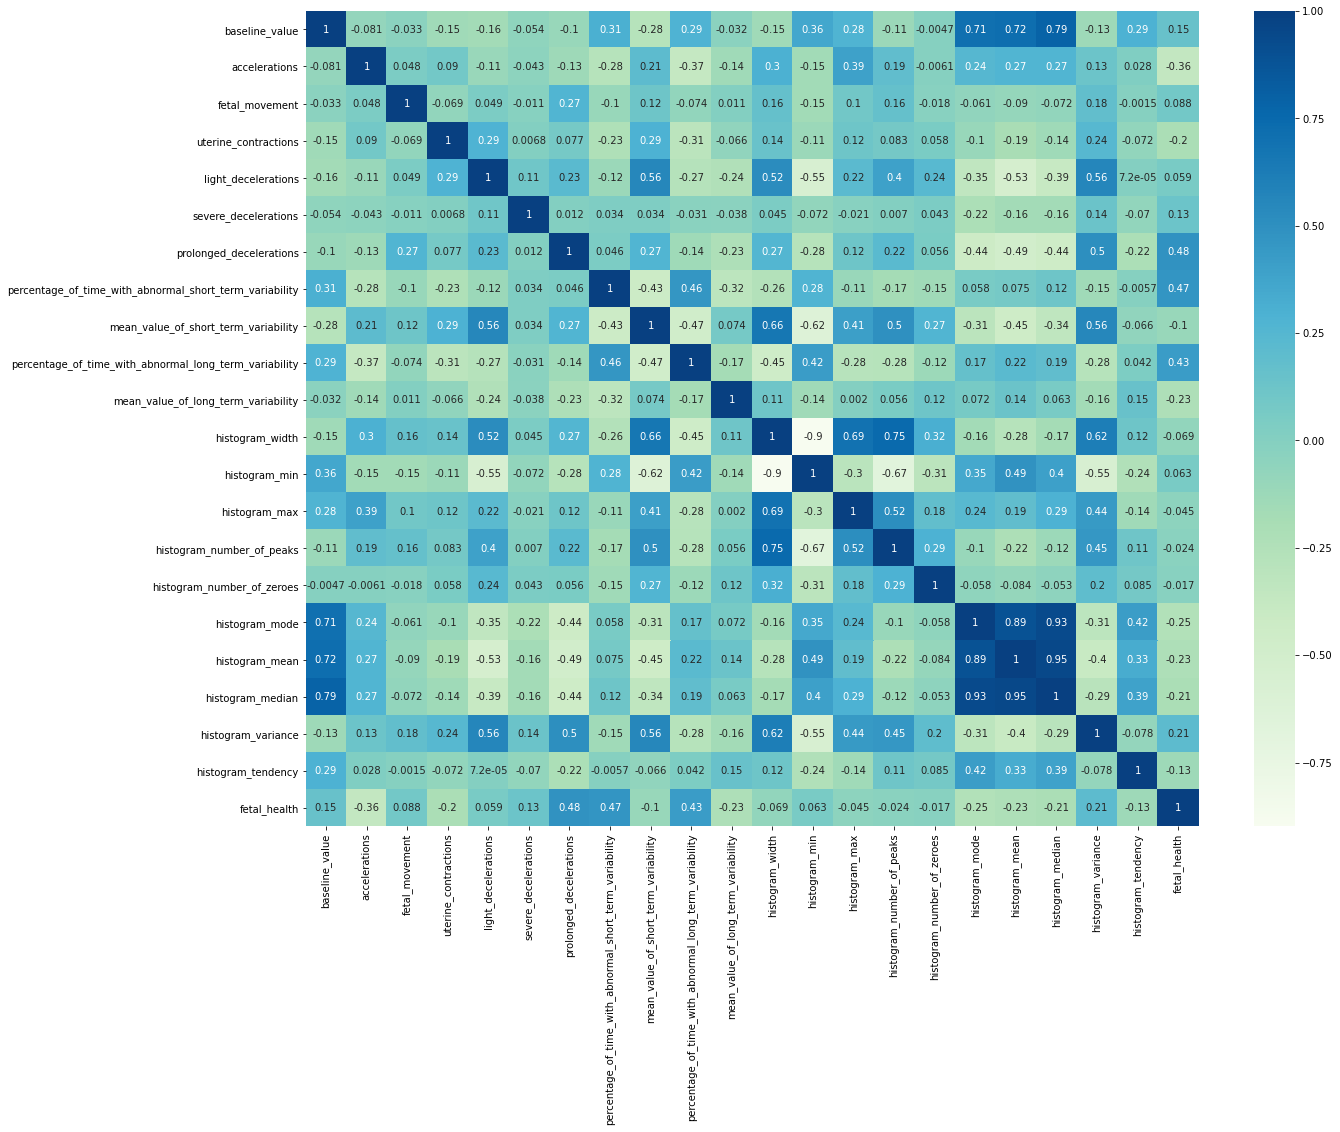

In [9]:
corr = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap="GnBu")
#plt.savefig('Heatmap')

In [10]:
features = corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#5F9EA0", as_cmap=True)

style = features.style.background_gradient(cmap=cm)
style

,fetal_health
fetal_health,1.000000
prolonged_decelerations,0.484859
percentage_of_time_with_abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline_value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


The feature showing the strongest correlation with fetal health is prolonged decelerations, with a correlation of 0.485. There are moderate correlations also observed between fetal health and percentage of time with abnormal short term variability, as well as fetal health and percentage of time with abnormal long term variability.

Three features: "prolongued_decelerations", "percentage_of_time_with_abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health).

### Analyze and visualize the target  (fetal_health) and features

In [11]:
# checking value counts for target variable
data.fetal_health.value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

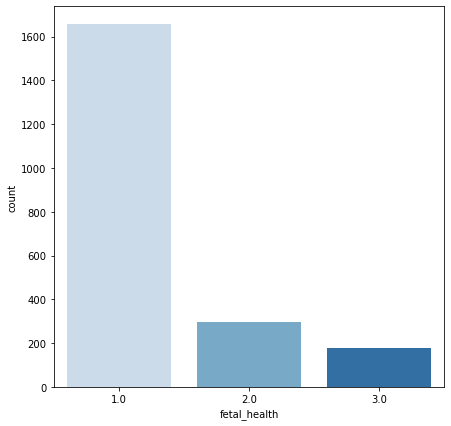

In [12]:
plt.figure(figsize = (7,7))
sns.countplot(x="fetal_health", data=data, palette="Blues")

The target class, fetal health, is very unbalanced. The majority of the fetal health outcomes observed in this dataset are 1.00, which is the designation for Normal fetal health. The class with the second-highest frequency is the 2.00 or Suspect fetal health class. The class with the lowest frequency in this dataset is 3.00 or Pathological fetal health.  
To make the data slightly easier to work with and understand, and turn this into a binary classification problem, I combined the 2.00 and 3.00 classes of Suspect and Pathological fetal health into a category called At Risk. I designated all the values of 1.00 as Normal.

In [13]:
# engineering new categorical target column for Normal and At Risk fetal health
data.loc[data['fetal_health']==1.000, 'fh_outcome'] = 'Normal'
data.loc[data['fetal_health']==2.000, 'fh_outcome'] = 'Risk'
data.loc[data['fetal_health']==3.000, 'fh_outcome'] = 'Risk'
data = data.drop(columns='fetal_health', axis=1)
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,percentage_of_time_with_abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Risk
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [14]:
data.fh_outcome.value_counts()

Normal    1655
Risk       471
Name: fh_outcome, dtype: int64

<AxesSubplot:xlabel='fh_outcome', ylabel='count'>

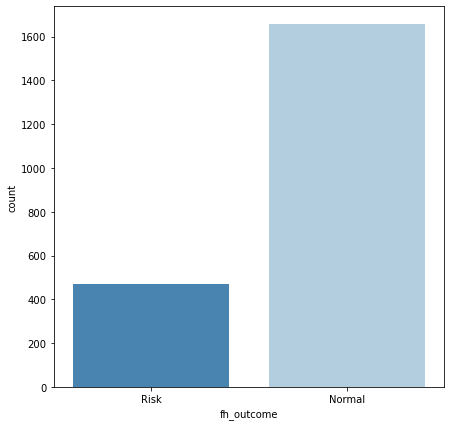

In [15]:
plt.figure(figsize = (7,7))
sns.countplot(x="fh_outcome", data=data,palette="Blues_r")

This is still very unbalanced, but is somewhat more straightforward as a binary classification problem. And if we are working to maximize fetal health, then any member of an at-risk category should be treated with seriousness and urgency.

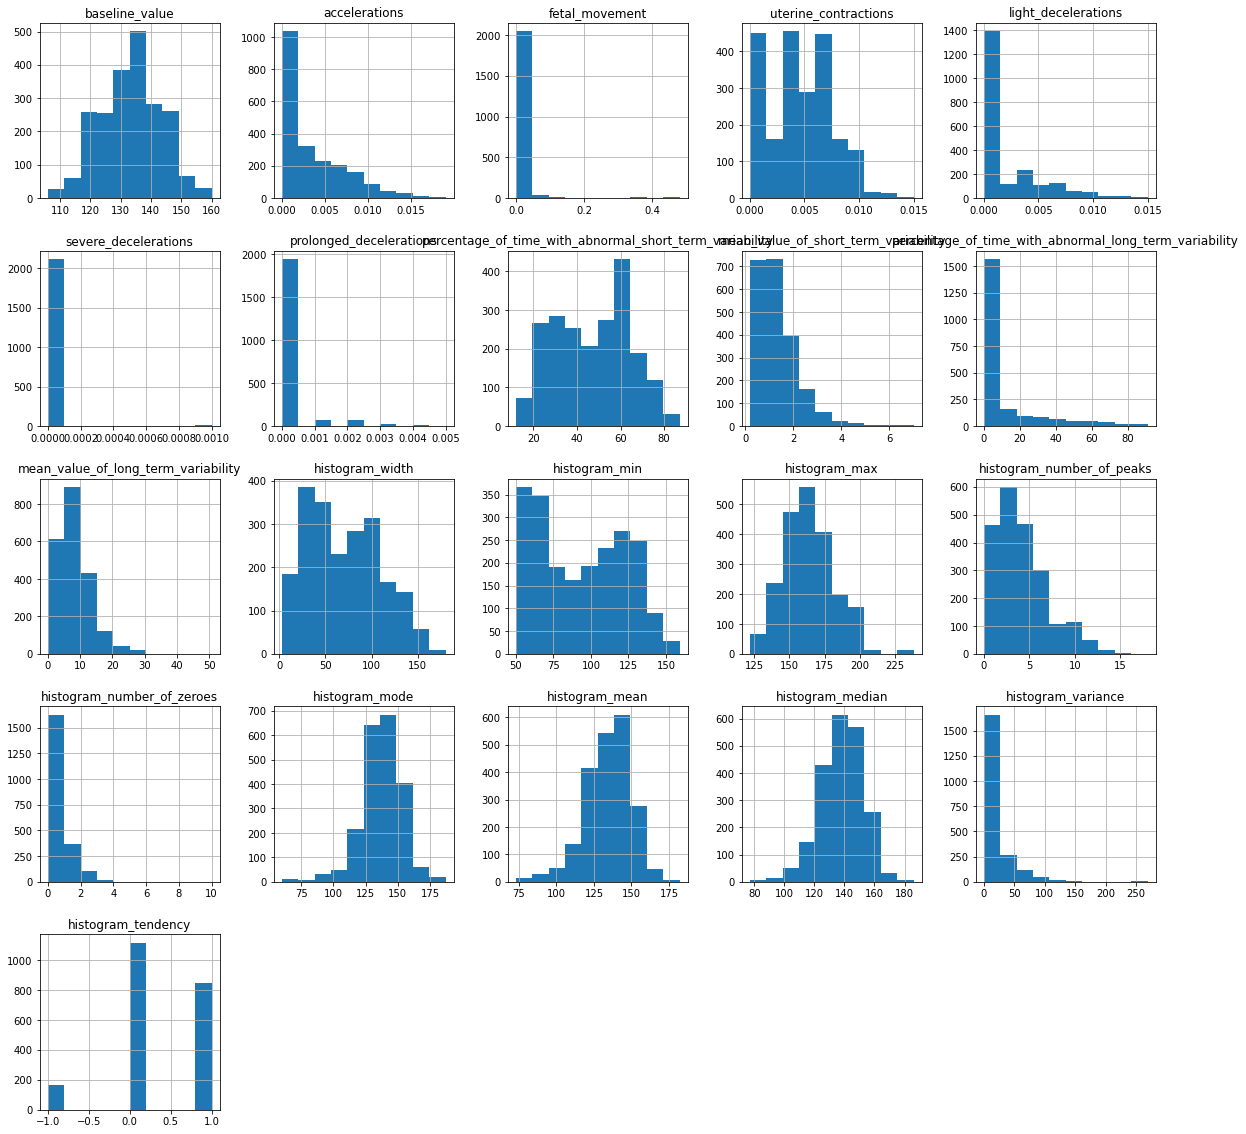

In [16]:
# plot histgram to see each feature's data distribution
hist_plot = data.hist(figsize=(20,20))

In [17]:
histogram_columns = ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

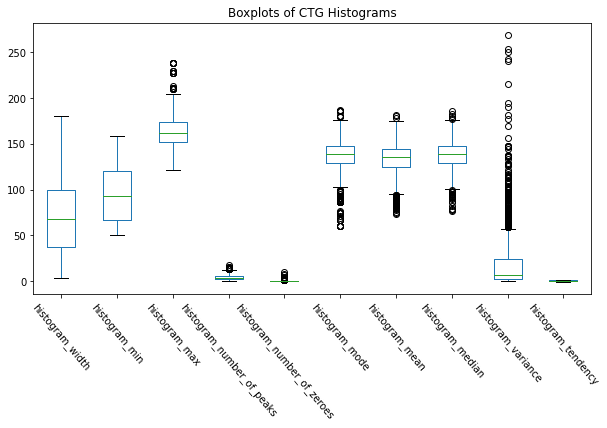

In [18]:
data[histogram_columns].plot(kind='box', figsize=(10,5));
plt.xticks(rotation=(-50))
plt.title('Boxplots of CTG Histograms');

A lot of the features in this dataset pertained to the actual histogram that is printed out during the duration of the CTG. They aren't particularly intuitive, and it seems that the significance of the CTG histogram measurements was somewhat ambiguous.

### Data types encoding

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   baseline_value                                           2126 non-null   float64
 1   accelerations                                            2126 non-null   float64
 2   fetal_movement                                           2126 non-null   float64
 3   uterine_contractions                                     2126 non-null   float64
 4   light_decelerations                                      2126 non-null   float64
 5   severe_decelerations                                     2126 non-null   float64
 6   prolonged_decelerations                                  2126 non-null   float64
 7   percentage_of_time_with_abnormal_short_term_variability  2126 non-null   float64
 8   mean_value_of_short_term_var

In [20]:
data = pd.get_dummies(data, columns=['fh_outcome'])
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,percentage_of_time_with_abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fh_outcome_Normal,fh_outcome_Risk
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1,0


In [21]:
data = data.drop(columns=['fh_outcome_Normal'], axis=1)
data = data.rename(columns={'fh_outcome_Risk':'target'})
data.target.value_counts()

0    1655
1     471
Name: target, dtype: int64

In [22]:
data.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolonged_decelerations,percentage_of_time_with_abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,target
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0


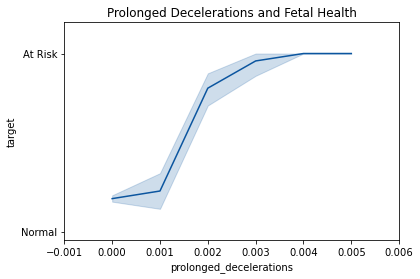

In [23]:
#sns.color_palette("light:#5A9", as_cmap=True)
sns.set_palette(sns.color_palette("Blues_r"))
sns.lineplot('prolonged_decelerations','target', data=data, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

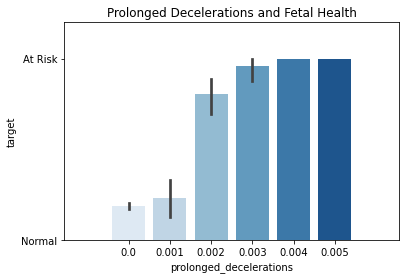

In [24]:
sns.set_palette(sns.color_palette("Blues"))
sns.barplot('prolonged_decelerations','target', data=data)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Prolonged Decelerations and Fetal Health')
plt.show()

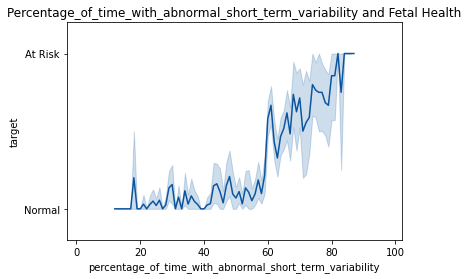

In [25]:
sns.set_palette(sns.color_palette("Blues_r"))
sns.lineplot('percentage_of_time_with_abnormal_short_term_variability','target', data=data, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Percentage_of_time_with_abnormal_short_term_variability and Fetal Health')
plt.show()

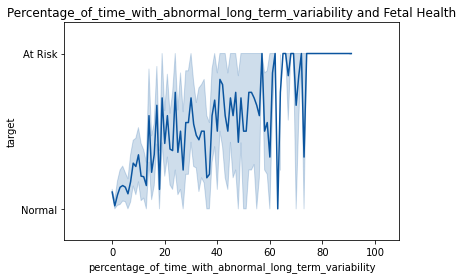

In [26]:
sns.set_palette(sns.color_palette("Blues_r"))
sns.lineplot('percentage_of_time_with_abnormal_long_term_variability','target', data=data, alpha=1.0)
y = [0,1]
labels = ['Normal', 'At Risk']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('Percentage_of_time_with_abnormal_long_term_variability and Fetal Health')
plt.show()

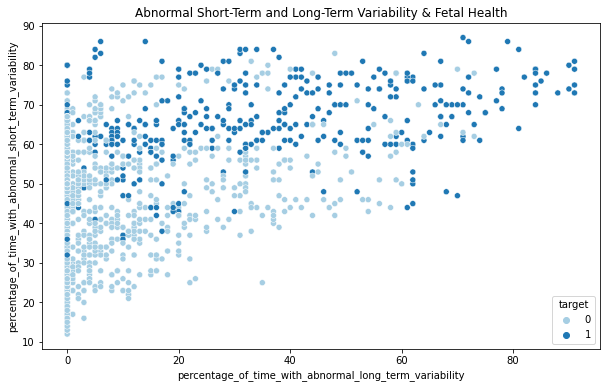

In [27]:
# create scatter plot for samples from each class
sns.set_palette(sns.color_palette("Paired"))
plt.figure(figsize=(10,6))
sns.scatterplot(x="percentage_of_time_with_abnormal_long_term_variability", y="percentage_of_time_with_abnormal_short_term_variability", hue='target', data=data)
plt.title('Abnormal Short-Term and Long-Term Variability & Fetal Health');

# 3. Modeling

In [28]:
# setting target and features
y = data['target']
X = data.drop(columns='target')
# splitting the data into train and test sets
# using stratify parameter to make sure class ratios 
# are distributed evenly across train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [29]:
# define the sclaer
scaler = StandardScaler()
# fit on the trainning dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test =  scaler.transform(X_test)

## Model_0 - Base Baseline Model: Dummy Guess

In [121]:
from sklearn.dummy import DummyClassifier

In [122]:
Dc_clf = DummyClassifier()

In [123]:
Dc_clf.fit(X_train,y_train)

DummyClassifier()

In [124]:
y_pred_train = Dc_clf.predict(X_train)
y_pred = Dc_clf.predict(X_test)

In [125]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1158
           1       0.21      0.20      0.21       330

    accuracy                           0.66      1488
   macro avg       0.49      0.49      0.49      1488
weighted avg       0.65      0.66      0.65      1488



In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       497
           1       0.23      0.23      0.23       141

    accuracy                           0.66       638
   macro avg       0.51      0.51      0.51       638
weighted avg       0.66      0.66      0.66       638



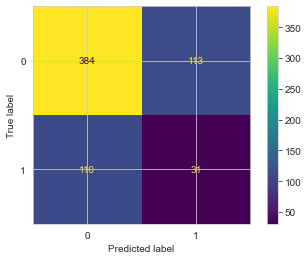

In [128]:
# plotting confusion matrix
plot_confusion_matrix(Dc_clf, X_test, y_test)
plt.grid(False)
plt.show()

The accuracy score of this dummy model is 66%, doing better than 50% guess. But the recall score performance is quite poor, only 23% of true positive was captured, which is absolutely unacceptable in this particular case. 

## Model_1_0 - Baseline Model: Decision Tree

In [30]:
# Baseline model of Decision Tree with default parameters:

tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [31]:
y_pred_train = tree_clf.predict(X_train)
y_pred = tree_clf.predict(X_test)

In [32]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1158
           1       0.98      0.79      0.88       330

    accuracy                           0.95      1488
   macro avg       0.96      0.89      0.92      1488
weighted avg       0.95      0.95      0.95      1488



In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       497
           1       0.88      0.77      0.82       141

    accuracy                           0.92       638
   macro avg       0.91      0.87      0.89       638
weighted avg       0.92      0.92      0.92       638



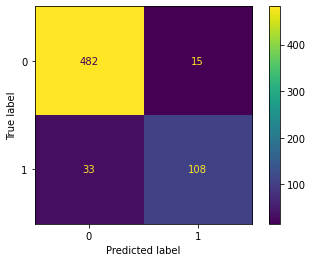

In [34]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test)
plt.show()

While an accuracy of 92% sounds like a good metric, it is important to note that this model missed 33 members of the at-risk fetal health class. Since we are dealing with the health outcomes and lives of babies, this is simply not acceptable. I will be evaluating my models with a focus on recall/sensitivity in order to minimize false negatives or Type II errors. In this case, the baseline recall value is 77%.

In [35]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.7659574468085106


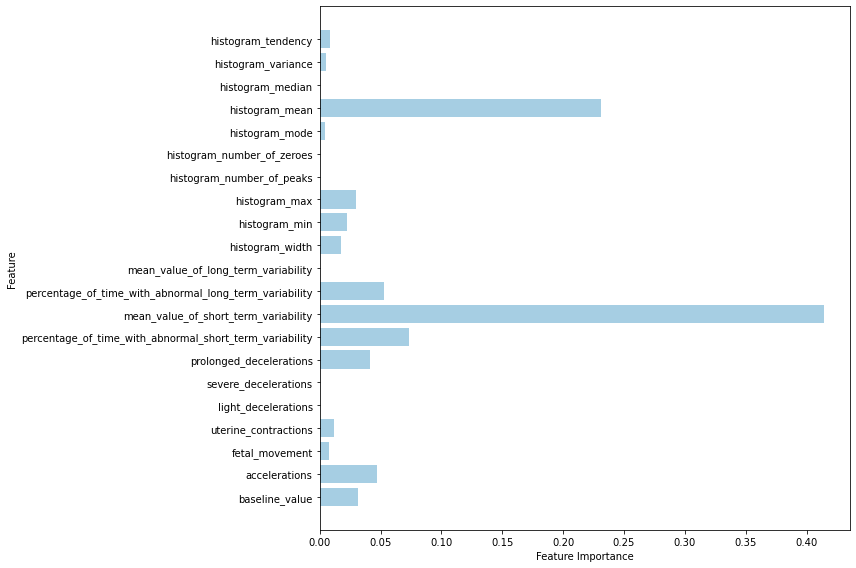

In [36]:
# plotting feature importances
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features),X.columns.values ) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.tight_layout()
#plt.savefig('./images/fig2.png')

## Model_1_1(Class_weight_balanced)

In [37]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(class_weight='balanced',max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [38]:
y_pred_train = tree_clf.predict(X_train)
y_pred = tree_clf.predict(X_test)

In [39]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1158
           1       0.91      0.90      0.90       330

    accuracy                           0.96      1488
   macro avg       0.94      0.94      0.94      1488
weighted avg       0.96      0.96      0.96      1488

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       497
           1       0.78      0.84      0.81       141

    accuracy                           0.91       638
   macro avg       0.87      0.89      0.88       638
weighted avg       0.92      0.91      0.91       638



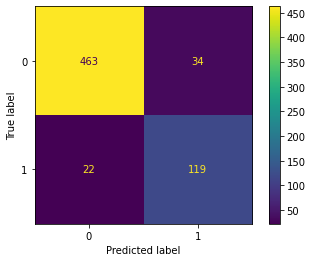

In [40]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test)
plt.show()

In [41]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.8439716312056738


In this model, we balanced class weight. Although the model accuracy score decreased a little bit, the recall/sensitivity score increased, which effectively made the false negative number decrease from 33 to 22 out of 141. 

## Model_1_2 (SMOTE)

In [42]:
# Fit SMOTE to training data
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

In [43]:
tree_clf = DecisionTreeClassifier(max_depth=5) 
tree_clf.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=5)

In [44]:
y_pred_train = tree_clf.predict(X_train_resampled)
y_pred = tree_clf.predict(X_test)

In [45]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1158
           1       0.96      0.94      0.95      1158

    accuracy                           0.95      2316
   macro avg       0.95      0.95      0.95      2316
weighted avg       0.95      0.95      0.95      2316

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       497
           1       0.74      0.84      0.79       141

    accuracy                           0.90       638
   macro avg       0.85      0.88      0.86       638
weighted avg       0.91      0.90      0.90       638



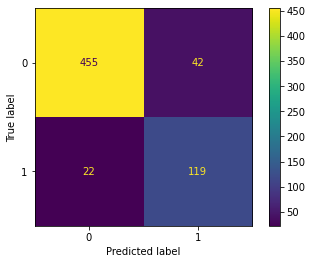

In [46]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test)
plt.show()

In [47]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.8439716312056738


## Model_1_3(GridSearchCV)

In [48]:
tree_clf = DecisionTreeClassifier()

In [49]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1, 2, 5, 10,20],
    'min_samples_split': [5,6,7,8,9],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [50]:
GridSearchCV_tree = GridSearchCV(estimator=tree_clf, 
                                param_grid=param_grid_tree, 
                                cv=5,
                                n_jobs = 4,
                                scoring = 'recall',
                                return_train_score=True
                                )
GridSearchCV_tree.fit(X_train_resampled,y_train_resampled)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             return_train_score=True, scoring='recall')

In [51]:
Best_params_tree = GridSearchCV_tree.best_params_
Best_params_tree

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [52]:
tree_clf_best = DecisionTreeClassifier(**Best_params_tree)

In [53]:
#**Best_params_tree 
#GridSearchCV_tree.best_estimator_ 

In [54]:
tree_clf_best.fit(X_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=9)

In [55]:
y_pred = tree_clf_best.predict(X_test)
y_pred_train = tree_clf_best.predict(X_train_resampled)

In [56]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1158
           1       0.96      0.94      0.95      1158

    accuracy                           0.95      2316
   macro avg       0.95      0.95      0.95      2316
weighted avg       0.95      0.95      0.95      2316

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       497
           1       0.75      0.86      0.80       141

    accuracy                           0.91       638
   macro avg       0.85      0.89      0.87       638
weighted avg       0.91      0.91      0.91       638



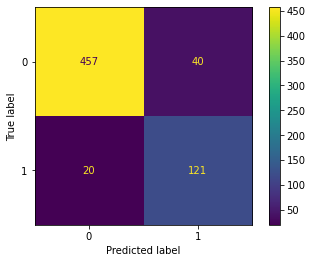

In [57]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf_best, X_test, y_test)
plt.show()

In [58]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.8581560283687943


# Mode_2 Logistic Regression(GridSearchCV)

In [59]:
Lr_clf = LogisticRegression()

In [60]:
param_grid_Lr = {"tol":[0.001,0.0001,0.00001],
                 "C": [0.01, 0.1, 1, 10,20],
                 "penalty":['l1', 'l2', 'elasticnet', 'none']
    
}

In [61]:
GridSearchCV_LR = GridSearchCV(estimator=Lr_clf, 
                                param_grid=param_grid_Lr, 
                                cv=3,
                                verbose=1, 
                                n_jobs=4,
                                scoring = 'recall',
                                return_train_score=True
                                )
GridSearchCV_LR.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 130 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.6s finished


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1, 10, 20],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='recall', verbose=1)

In [62]:
Best_params_Lr = GridSearchCV_LR.best_params_
Best_params_Lr

{'C': 0.01, 'penalty': 'none', 'tol': 0.001}

In [63]:
Lr_clf_best = LogisticRegression(**Best_params_Lr)

In [64]:
Lr_clf_best.fit(X_train_resampled,y_train_resampled)

LogisticRegression(C=0.01, penalty='none', tol=0.001)

In [65]:
y_pred_train = Lr_clf_best.predict(X_train_resampled)
y_pred = Lr_clf_best.predict(X_test)

In [66]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      1158
           1       0.90      0.95      0.92      1158

    accuracy                           0.92      2316
   macro avg       0.92      0.92      0.92      2316
weighted avg       0.92      0.92      0.92      2316

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       497
           1       0.67      0.93      0.78       141

    accuracy                           0.88       638
   macro avg       0.82      0.90      0.85       638
weighted avg       0.91      0.88      0.89       638



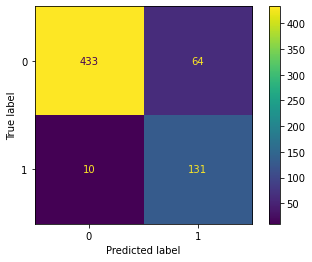

In [67]:
# plotting confusion matrix
plot_confusion_matrix(Lr_clf_best, X_test, y_test)
plt.show()

In [68]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.9290780141843972


# 4. Model_3(Random Froest)

In [69]:
Rf_clf = RandomForestClassifier()

In [70]:
param_grid_Rf = {"min_samples_split": [2, 6],
                 "min_samples_leaf": [1, 9, 16],
                 "n_estimators" :[100,200,300,400],
                 "criterion": ["gini","entropy"],
                 "max_depth": [3,5]#RF?????????????????????
                 }

In [71]:
GridSearchCV_RF = GridSearchCV(estimator=Rf_clf, 
                                param_grid=param_grid_Rf, 
                                cv=5,
                                verbose=1, 
                                n_jobs=4,
                                scoring = 'recall',
                                return_train_score=True
                                )

In [72]:
# Fit model with train data
GridSearchCV_RF.fit(X_train_resampled, y_train_resampled);

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 268 tasks      | elapsed:   27.6s
[Parallel(n_jobs=4)]: Done 480 out of 480 | elapsed:   52.0s finished


In [73]:
Best_params_Rf = GridSearchCV_RF.best_params_
Best_params_Rf

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [74]:
Rf_clf_best = RandomForestClassifier(**Best_params_Rf)

In [75]:
Rf_clf_best.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200)

In [76]:
y_pred_train = Rf_clf_best.predict(X_train_resampled)
y_pred = Rf_clf_best.predict(X_test)

In [77]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1158
           1       0.95      0.96      0.96      1158

    accuracy                           0.96      2316
   macro avg       0.96      0.96      0.96      2316
weighted avg       0.96      0.96      0.96      2316

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       497
           1       0.79      0.91      0.85       141

    accuracy                           0.93       638
   macro avg       0.88      0.92      0.90       638
weighted avg       0.93      0.93      0.93       638



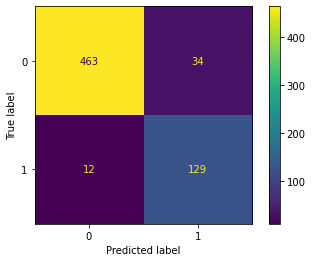

In [78]:
# plotting confusion matrix
plot_confusion_matrix(Rf_clf_best, X_test, y_test)
plt.show()

In [79]:
print('Recall score: ',recall_score(y_test, y_pred))

Recall score:  0.9148936170212766


# 5. Model_4(Gradient Boosting)

In [80]:
Gb_clf = GradientBoostingClassifier()

In [81]:
param_grid_Gb = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.1, 0.25, 0.5, 1], 
              "n_estimators": [200,300,500],
              "max_depth": [3, 5]
              }

In [82]:
GridSearchCV_GBC = GridSearchCV(estimator=Gb_clf, 
                                param_grid=param_grid_Gb, 
                                cv=5,
                                verbose=1, 
                                n_jobs=-1,
                                scoring = 'recall',
                                return_train_score=True
                                )

In [83]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   50.4s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.25, 0.5, 1],
                         'loss': ['deviance'], 'max_depth': [3, 5],
                         'n_estimators': [200, 300, 500]},
             return_train_score=True, scoring='recall', verbose=1)

In [84]:
Best_params_Gb = GridSearchCV_GBC.best_params_
Best_params_Gb

{'learning_rate': 0.25,
 'loss': 'deviance',
 'max_depth': 5,
 'n_estimators': 300}

In [85]:
Gb_clf_best = GradientBoostingClassifier(**Best_params_Gb)

In [86]:
Gb_clf_best.fit(X_train_resampled,y_train_resampled)

GradientBoostingClassifier(learning_rate=0.25, max_depth=5, n_estimators=300)

In [87]:
y_pred_train = Gb_clf_best.predict(X_train_resampled)
y_pred = Gb_clf_best.predict(X_test)

In [88]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       1.00      1.00      1.00      1158

    accuracy                           1.00      2316
   macro avg       1.00      1.00      1.00      2316
weighted avg       1.00      1.00      1.00      2316

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       497
           1       0.86      0.91      0.89       141

    accuracy                           0.95       638
   macro avg       0.92      0.93      0.93       638
weighted avg       0.95      0.95      0.95       638



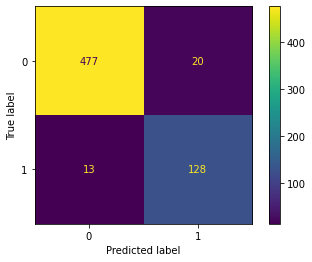

In [89]:
# plotting confusion matrix
plot_confusion_matrix(Gb_clf_best, X_test, y_test)
plt.show()

# 6. Model_5(SVM)

In [90]:
Svc_clf = SVC()

In [91]:
param_grid_SVM = {"C":[0.5,1,2,3,5], 
                  "tol":[0.001,0.0001,0.00001],
                  "kernel":['linear','rbf','poly'],
#                  "gamma":['scale','auto',0.1,0.01,0.001,0.0001]
                  }

In [92]:
GridSearchCV_SVM = GridSearchCV(estimator=Svc_clf, 
                                param_grid=param_grid_SVM, 
                                cv=5,
                                verbose=1, 
                                n_jobs=-1,
                                scoring = 'recall',
                                return_train_score=True
                                )

In [93]:
GridSearchCV_SVM.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 210 out of 225 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 2, 3, 5],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'tol': [0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='recall', verbose=1)

In [94]:
Best_params_Svc = GridSearchCV_SVM.best_params_
Best_params_Svc

{'C': 1, 'kernel': 'rbf', 'tol': 0.001}

In [95]:
Svc_clf_best = SVC(**Best_params_Svc)

In [96]:
Svc_clf_best.fit(X_train_resampled,y_train_resampled)

SVC(C=1)

In [97]:
y_pred_train = Svc_clf_best.predict(X_train_resampled)
y_pred = Svc_clf_best.predict(X_test)

In [98]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1158
           1       0.93      0.99      0.96      1158

    accuracy                           0.96      2316
   macro avg       0.96      0.96      0.96      2316
weighted avg       0.96      0.96      0.96      2316

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       497
           1       0.71      0.94      0.81       141

    accuracy                           0.90       638
   macro avg       0.85      0.92      0.87       638
weighted avg       0.92      0.90      0.91       638



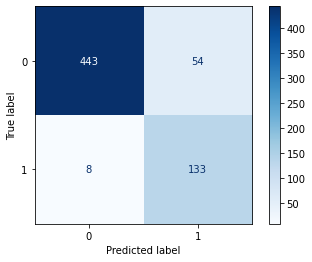

In [99]:
# plotting confusion matrix
plot_confusion_matrix(Svc_clf_best, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

# 7. Model_6(XGBoost)

In [100]:
from xgboost import XGBClassifier

In [101]:
Xgb_clf = XGBClassifier()

In [102]:
param_grid_XGB = {
    'learning_rate': [0.01,0.1, 0.2],
    'max_depth': [3],
    'min_child_weight': [1, 2],
    'subsample': [0.5],
    'n_estimators': [100,200],
}

In [103]:
GridSearchCV_XGB = GridSearchCV(estimator=Xgb_clf, 
                                param_grid=param_grid_XGB, 
                                cv=5,
                                verbose=1, 
                                n_jobs=4,
                                scoring = 'recall',
                                return_train_score=True
                                )

In [104]:
GridSearchCV_XGB.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [105]:
Best_params_Xgb = GridSearchCV_XGB.best_params_
Best_params_Xgb

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 0.5}

In [106]:
GridSearchCV_XGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
Xgb_clf_best = XGBClassifier(**Best_params_Svc)

In [108]:
Xgb_clf_best.fit(X_train_resampled,y_train_resampled)

[17:31:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { C, kernel, tol } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(C=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='', kernel='rbf',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tol=0.001, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [109]:
y_pred_train = Xgb_clf_best.predict(X_train_resampled)
y_pred = Xgb_clf_best.predict(X_test)

In [110]:
print(classification_report(y_train_resampled, y_pred_train))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       1.00      1.00      1.00      1158

    accuracy                           1.00      2316
   macro avg       1.00      1.00      1.00      2316
weighted avg       1.00      1.00      1.00      2316

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       497
           1       0.89      0.90      0.89       141

    accuracy                           0.95       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.95      0.95      0.95       638



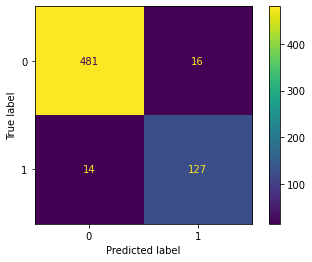

In [111]:
# plotting confusion matrix
plot_confusion_matrix(Xgb_clf_best, X_test, y_test)
plt.show()

In [112]:
from sklearn.metrics import roc_curve, auc
# Calculate the probability scores of each point in the training set
y_train_score = Svc_clf_best.decision_function(X_train_resampled)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train_resampled, y_train_score)

# Calculate the probability scores of each point in the test set
y_test_score = Svc_clf_best.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Training AUC: 0.9892014252433325
Test AUC: 0.9728726971759636


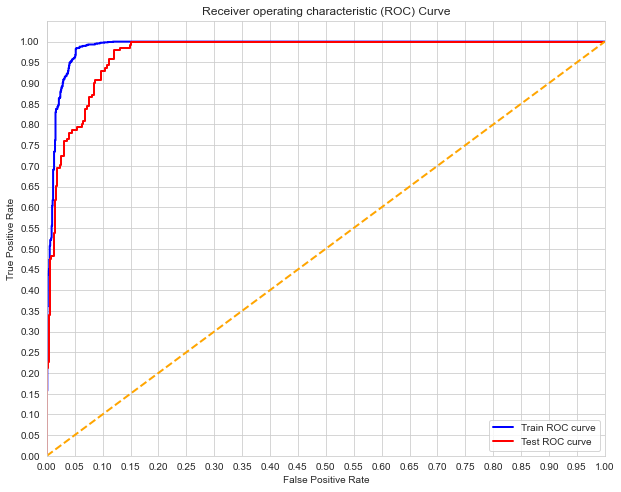

In [138]:
sns.set_style('whitegrid')

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='orange', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
print('Training AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
plt.show()

In [132]:
# # ROC curve for test set
# plt.figure(figsize=(10, 8))
# lw = 2
# plt.plot(test_fpr, test_tpr, color='lightblue',
#          lw=lw, label='ROC curve')
# plt.plot([0, 1], [0, 1], color='orange', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.yticks([i/20.0 for i in range(21)])
# plt.xticks([i/20.0 for i in range(21)])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
# plt.legend(loc='lower right')
# print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))
# print('')
# plt.show()

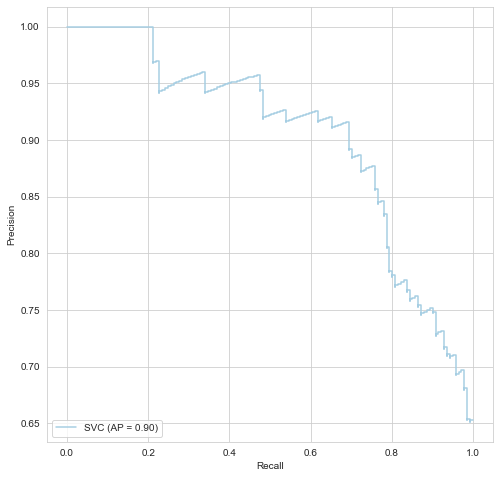

In [137]:
fig,ax = plt.subplots(figsize = (8,8))
plot_precision_recall_curve(Svc_clf_best, X = X_test, y = y_test,ax = ax) 

The ROV curve and precision-recall curve show that while recall was prioritized, the model still did pretty well with precision too. This is also demonstrated by the model's F1 score of 81%, which indicates that the model performed quite well.The AUC of 97.3% also shows that this model works really well. Based on the performance of the model, especially the recall/sensitivity rate of 94%, I reject the null hypothesis that there is no relationship between automated CTG data and fetal health outcome.

## Conclustion

In conclusion, CTGs data provide easily accessible and interpretable insight into fetal health conditions. Machine learning models are able to predict if a fetus is at risk or normal using CTG data with a high level of recall score.

## Recommendation

1. Based on my findings, cardiotocogram readings are able to predict fetal health outcomes. My main recommendation is that CTGs should be performed as often as possible on mothers in pregnancy. This is a highly interpretable way to maintain the necessary level of care to track maternal and fetal health.

2. My second recommendation is that healthcare providers pay close attention to all measures of fetal heart rate, as these are the strongest predictors of at-risk fetal health outcomes. These measures include the percentage of time with abnormal short-term variability, the percentage of time with abnormal long-term variability, and prolonged decelerations.

3. My final recommendation is to treat all indicators of at-risk outcomes with urgency and a better-safe-than-sorry approach. Always put human life as the top priority.

## Future Work

1. As CTG use is widely implemented for all pregnant mothers, we would use more new observations data and fetal health outcomes to further improve the modeling sensitivity score in order to never miss a single instance of at-risk fetal health.

2. In the data we already have, there are many features of fetal heart histograms generated by the CTG exam. We have not yet explored the impact of these CTG histograms and what their values mean for fetal health predictions.

3. By adding new features, such as obstetrician's periodic checking reports, we could find new trends and have more information to make predicitons. 
